No
feature selection and normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
print(missing)

               index    0
0         customerID  0.0
1             gender  0.0
2      SeniorCitizen  0.0
3            Partner  0.0
4         Dependents  0.0
5             tenure  0.0
6       PhoneService  0.0
7      MultipleLines  0.0
8    InternetService  0.0
9     OnlineSecurity  0.0
10      OnlineBackup  0.0
11  DeviceProtection  0.0
12       TechSupport  0.0
13       StreamingTV  0.0
14   StreamingMovies  0.0
15          Contract  0.0
16  PaperlessBilling  0.0
17     PaymentMethod  0.0
18    MonthlyCharges  0.0
19      TotalCharges  0.0
20             Churn  0.0


In [4]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
#check if to_numeric altered anything resulting in data loss
#11 missing values in total charges
print('missing values', data['TotalCharges'].isnull().sum())

missing values 11


In [6]:
data.dropna(how='any', inplace=True)
print('resulting missing values', data['TotalCharges'].isnull().sum())
data.drop(columns = ['customerID'], inplace = True)


resulting missing values 0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = data.copy(deep = True)
text_data_features = [i for i in list(data.columns) if i not in list(data.describe().columns)]
                                                                #list of SeniorCit, tenure, MonthlyChar, TotalChar

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [8]:
df1[data.describe().columns]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [36]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


# Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,:19].values, df1.iloc[:,19].values, test_size = 0.20, random_state = 2)

In [11]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Clf

Cross Validation Score :  84.22%
ROC_AUC Score :  68.39%


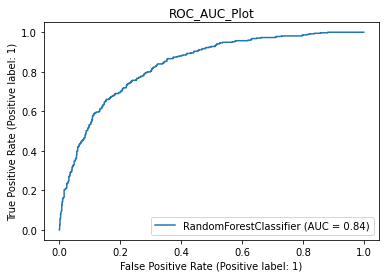

In [13]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.69      0.44      0.54       374

    accuracy                           0.80      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.79      0.80      0.78      1407



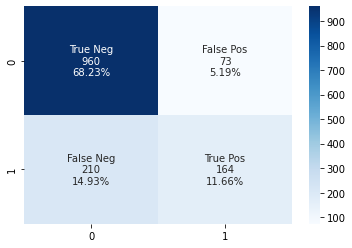

In [14]:
model_evaluation(classifier_rf,x_test,y_test)

## Knn

Cross Validation Score :  77.87%
ROC_AUC Score :  67.63%


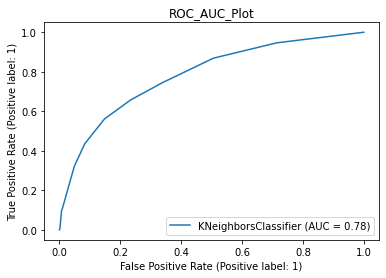

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=11)
model(classifier_knn,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1033
           1       0.65      0.44      0.52       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



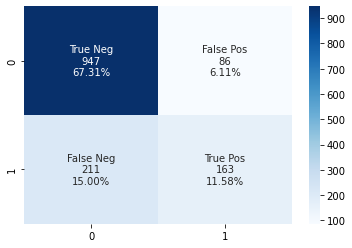

In [16]:
model_evaluation(classifier_knn,x_test,y_test)

## Log Reg

Cross Validation Score :  84.22%
ROC_AUC Score :  71.53%


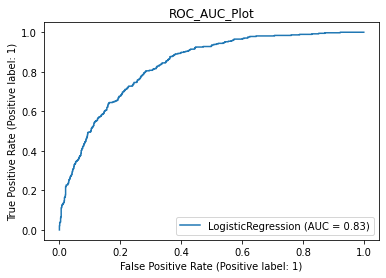

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.78      0.79      0.79      1407



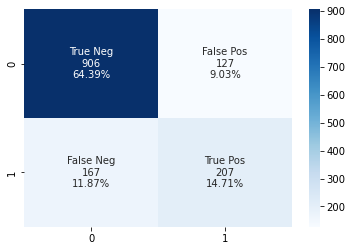

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model(logreg,x_train,y_train,x_test,y_test)

model_evaluation(logreg,x_test,y_test)

Cross Validation Score :  84.78%
ROC_AUC Score :  71.37%


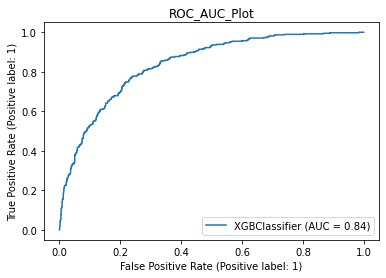

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



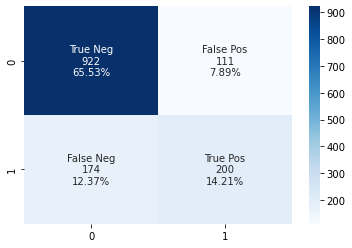

In [18]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,x_train,y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

Cross Validation Score :  84.72%
ROC_AUC Score :  71.49%


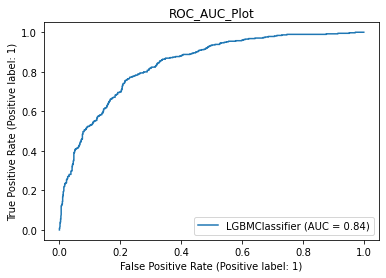

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



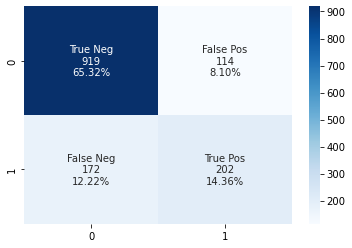

In [19]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_lgbm,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lgbm,x_test,y_test)

In [24]:
#check feature importance, replug

# SkLearn UpSample

In [20]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,:19], df1.iloc[:,19], test_size = 0.20, random_state = 2)

In [22]:
from sklearn.utils import resample

df = pd.concat([x_train, y_train], axis=1)

df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority), # to match majority class
                                 random_state=1234) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['Churn'].value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [23]:
up_y_train = df_upsampled['Churn']
up_x_train = df_upsampled.drop(columns='Churn')

Text(0.5, 1.0, 'Count of TARGET Varialbe per category')

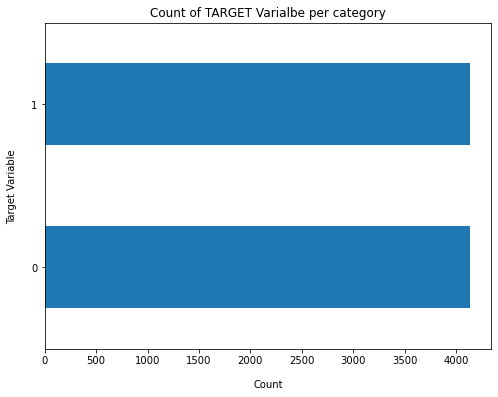

In [24]:
df_upsampled['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Varialbe per category")

In [25]:
#over = NearMiss(version=3)
#f1 = df1.iloc[:,:13].values #features
#t1 = df1.iloc[:,13].values #outcome variable

#x_train, y_train = over.fit_resample(x_train, y_train)

In [26]:
#x_train, x_test, y_train, y_test = train_test_split(df_upsampled.iloc[:,:13], df_upsampled.iloc[:,13], test_size = 0.20, random_state = 2)

## Upsample | Random Forest Clf

Cross Validation Score :  84.86%
ROC_AUC Score :  75.23%


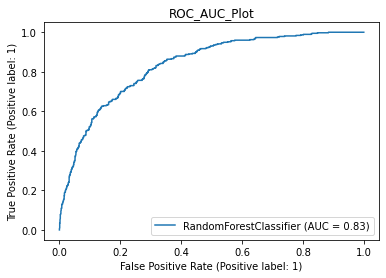

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407



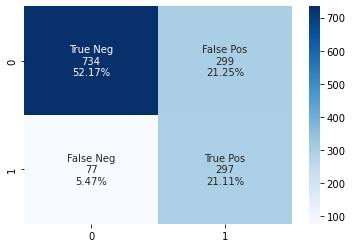

In [27]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf,up_x_train,up_y_train,x_test,y_test)

model_evaluation(classifier_rf,x_test,y_test)

# Upsample | Knn

Cross Validation Score :  82.68%
ROC_AUC Score :  69.74%


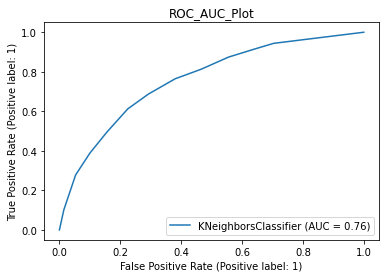

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1033
           1       0.46      0.69      0.55       374

    accuracy                           0.70      1407
   macro avg       0.66      0.70      0.66      1407
weighted avg       0.76      0.70      0.72      1407



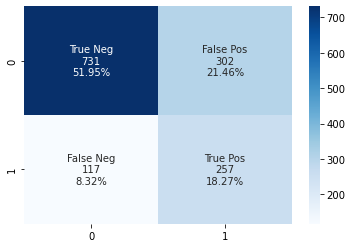

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=11)
model(classifier_knn,up_x_train,up_y_train,x_test,y_test)

model_evaluation(classifier_knn,x_test,y_test)

# Upsample | Logistic Regression

Cross Validation Score :  84.29%
ROC_AUC Score :  76.37%


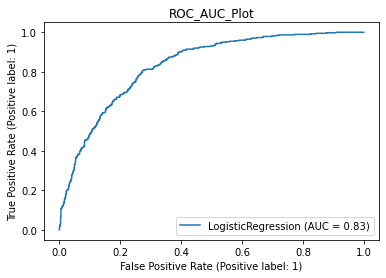

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1033
           1       0.51      0.81      0.63       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.81      0.74      0.76      1407



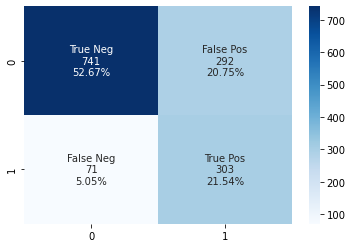

In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model(logreg,up_x_train,up_y_train,x_test,y_test)

model_evaluation(logreg,x_test,y_test)

# Upsample | XGB

Cross Validation Score :  86.78%
ROC_AUC Score :  75.46%


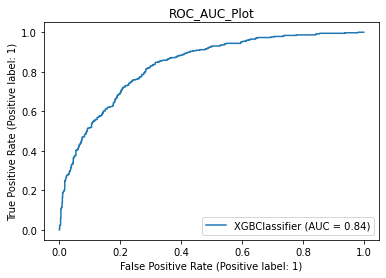

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



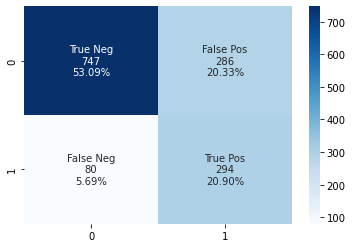

In [30]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_xgb,up_x_train,up_y_train,x_test,y_test)
model_evaluation(classifier_xgb,x_test,y_test)

# Upsample | LGBMCLF

Cross Validation Score :  86.79%
ROC_AUC Score :  76.18%


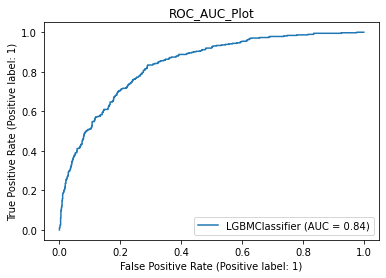

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.74      0.76      1407



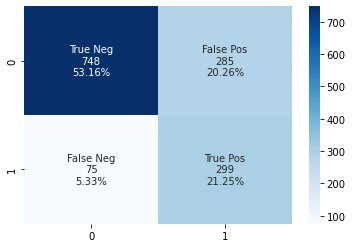

In [31]:
from lightgbm import LGBMClassifier
classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
model(classifier_lgbm,up_x_train,up_y_train,x_test,y_test)
model_evaluation(classifier_lgbm,x_test,y_test)

<AxesSubplot:>

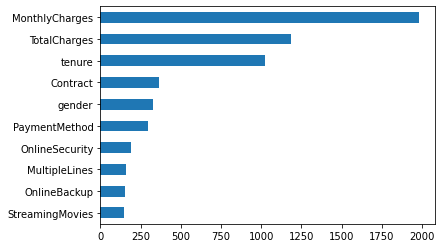

In [33]:
importances = classifier_lgbm.feature_importances_
weights = pd.Series(importances,
                 index=df1.iloc[:,:19].columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel='linear')
model(classifier_svm,up_x_train,up_y_train,x_test,y_test)
model_evaluation(classifier_svm,x_test,y_test)